# Indian Patent Analysis
#### This dataset contains the patents that have been published from 2016-2023 and the count is approximately 115K covering chennai, delhi,kolkata and mumbai.

#### Patents are a form of intellectual property protection that grants exclusive rights to inventors or creators of new inventions, processes, or technologies. In India, the patent system is governed by the Patents Act, 1970, and is administered by the Indian Patent Office under the Office of the Controller General of Patents, Designs, and Trademarks.

## Columns Description  
**PUBLICATION_NUMBER** - _A number assigned to a patent application at the time of publication_   
**PUBLICATION_DATE** --> _The date on which patent has been issued granting exclusive privilege_  
**IPO_LOCATION** --> _In which city does the patent has been applied/issued_  
**APPLICATION_TYPE_DESC** --> _Describes the type of patent application that tells about importance of that application_  
**APPLICATION_NUMBER** --> _application number of the patent_    
**DATE_OF_FILING** --> _The date on which that particular patent has been filed for granting rights_   
**TITLE_OF_INVENTION** --> _Name of that invention and specific subject_   
**FIELD_OF_INVENTION** --> _To which subject under which that inevntion falls_   	
**NO_OF_PAGES** --> _No of pages of that application_	
**NO_OF_CLAIMS** --> _More the number of claims more the patent rights that applicant has been given/asked	
**DATE_UPDATED_d_m_y** --> recent date on which application has been reviewed for extention/limitation of present patents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1=pd.read_csv('application_details_granted_2016.csv')
df2=pd.read_csv('application_details_granted_2017.csv')
df3=pd.read_csv('application_details_granted_2018.csv')
df4=pd.read_csv('application_details_granted_2019.csv')
df5=pd.read_csv('application_details_granted_2020.csv')
df6=pd.read_csv('application_details_granted_2021.csv')
df7=pd.read_csv('application_details_granted_2022.csv')
df8=pd.read_csv('application_details_granted_2023.csv')

In [3]:
pat=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
pat.head()

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y
0,01/2016,01/01/2016,Delhi,CONVENTION APPLICATION,10/DEL/2010,04/01/2010,"""PRODUCTION OF A PHARMACEUTICAL CONTAINER FROM...",CHEMISTRY,25.0,24.0,19/04/2023
1,01/2016,01/01/2016,Mumbai,PCT NATIONAL PHASE APPLICATION,1005/MUMNP/2007,03/07/2007,“A MANUFACTURING METHOD OF AN ANODE PLATE OF A...,ELECTRICAL,21.0,12.0,19/04/2023
2,01/2016,01/01/2016,Kolkata,CONVENTION APPLICATION,104/KOL/2007,29/01/2007,MOTOR-DRIVEN SURGICAL CUTTING AND FASTENING IN...,BIOMEDICAL,39.0,10.0,19/04/2023
3,01/2016,01/01/2016,Mumbai,PCT NATIONAL PHASE APPLICATION,1045/MUMNP/2009,28/05/2009,SYSTEM AND METHOD FOR DIGITAL SIGNAL PROCESSING,ELECTRONICS,55.0,25.0,19/04/2023
4,01/2016,01/01/2016,Mumbai,PCT NATIONAL PHASE APPLICATION,1070/MUMNP/2009,03/06/2009,“STERILISATION INDICATOR”,PHYSICS,19.0,16.0,19/04/2023


In [4]:
pat.shape

(151439, 11)

In [5]:
pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151439 entries, 0 to 151438
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PUBLICATION_NUMBER     151439 non-null  object 
 1   PUBLICATION_DATE       151439 non-null  object 
 2   IPO_LOCATION           151439 non-null  object 
 3   APPLICATION_TYPE_DESC  151439 non-null  object 
 4   APPLICATION_NUMBER     151439 non-null  object 
 5   DATE_OF_FILING         151439 non-null  object 
 6   TITLE_OF_INVENTION     151438 non-null  object 
 7   FIELD_OF_INVENTION     151214 non-null  object 
 8   NO_OF_PAGES            151309 non-null  float64
 9   NO_OF_CLAIMS           151219 non-null  float64
 10  DATE_UPDATED_d_m_y     151439 non-null  object 
dtypes: float64(2), object(9)
memory usage: 12.7+ MB


In [6]:
pat['PUBLICATION_DATE']=pd.to_datetime(pat['PUBLICATION_DATE'],format='mixed')
pat['DATE_OF_FILING']=pd.to_datetime(pat['DATE_OF_FILING'],format='mixed')

In [7]:
pat.drop(columns=['APPLICATION_NUMBER','DATE_UPDATED_d_m_y'],inplace=True)

In [8]:
pat.isna().mean()

PUBLICATION_NUMBER       0.000000
PUBLICATION_DATE         0.000000
IPO_LOCATION             0.000000
APPLICATION_TYPE_DESC    0.000000
DATE_OF_FILING           0.000000
TITLE_OF_INVENTION       0.000007
FIELD_OF_INVENTION       0.001486
NO_OF_PAGES              0.000858
NO_OF_CLAIMS             0.001453
dtype: float64

In [9]:
pat.duplicated().sum()

30

In [10]:
pat.drop_duplicates(inplace=True)

In [11]:
pat.shape

(151409, 9)

In [12]:
ti=(pat['PUBLICATION_DATE']-pat['DATE_OF_FILING']).mean().days/365
ti

6.7972602739726025

**On an average it takes--> 6.8 years for a patent to be assigned after submitting application
year_filing
pat['year_filing']=pat['DATE_OF_FILING'].dt.year**

In [13]:
pat['year_filing']=pat['DATE_OF_FILING'].dt.year

In [14]:
pat['diff']=(pat['PUBLICATION_DATE']-pat['DATE_OF_FILING']).dt.days

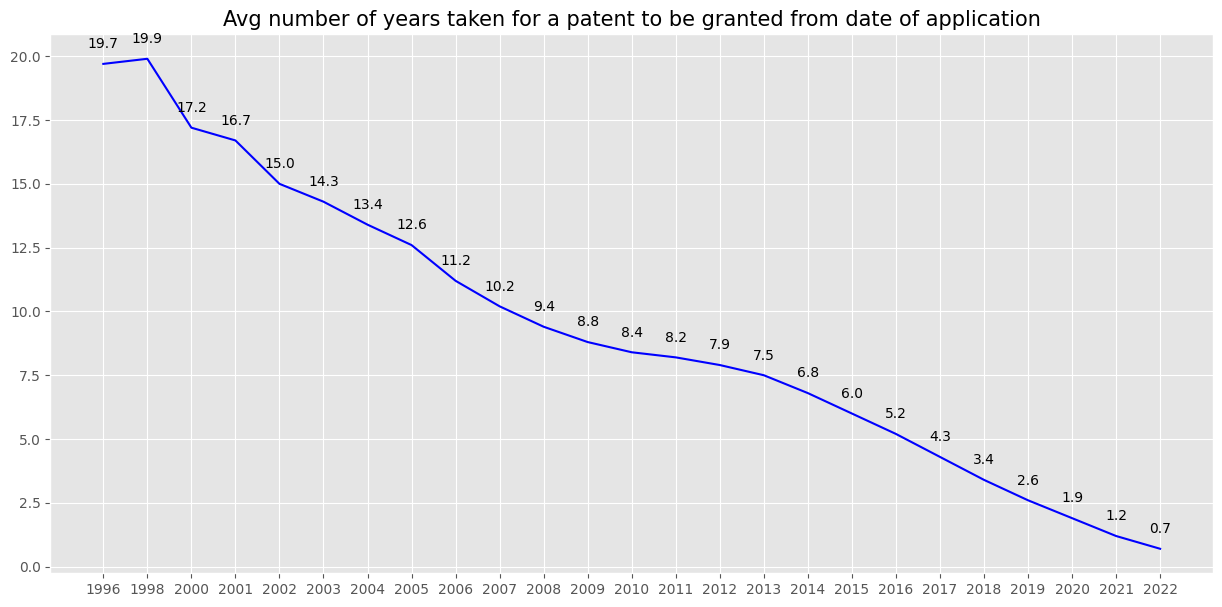

In [16]:
p=pat.groupby('year_filing')['diff'].mean().index.values.astype('str')
q=pat.groupby('year_filing')['diff'].mean().values/365
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
sns.lineplot(x=p,y=np.round(q,1),color='b')
for i, value in enumerate(np.round(q, 1)):
    plt.text(i, value+0.5, str(value), ha='center', va='bottom')
plt.title('Avg number of years taken for a patent to be granted from date of application',fontsize=15)
plt.show()

In [17]:
df1.FIELD_OF_INVENTION

0           CHEMISTRY
1          ELECTRICAL
2          BIOMEDICAL
3         ELECTRONICS
4             PHYSICS
            ...      
8059          POLYMER
8060        CHEMISTRY
8061       MECHANICAL
8062    BIOTECHNOLOGY
8063          PHYSICS
Name: FIELD_OF_INVENTION, Length: 8064, dtype: object

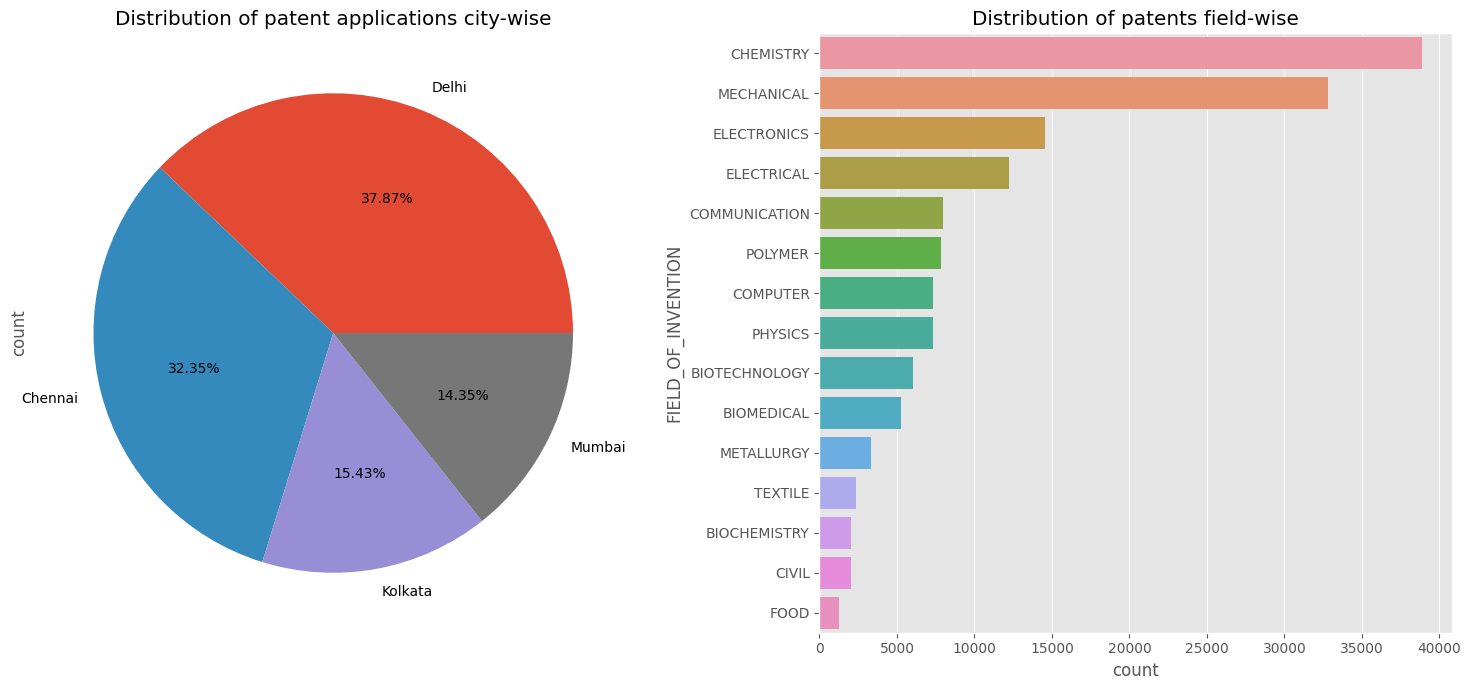

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
pat['IPO_LOCATION'].value_counts().plot(kind='pie',autopct='%.2f%%',ax=ax1)
ax1.set_title('Distribution of patent applications city-wise')
df1=pat['FIELD_OF_INVENTION'].value_counts().reset_index()
p=sns.barplot(data=df1,x='count',y='FIELD_OF_INVENTION',ax=ax2)
ax2.set_title('Distribution of patents field-wise')
plt.tight_layout()
plt.show()

<Axes: xlabel='year_filing'>

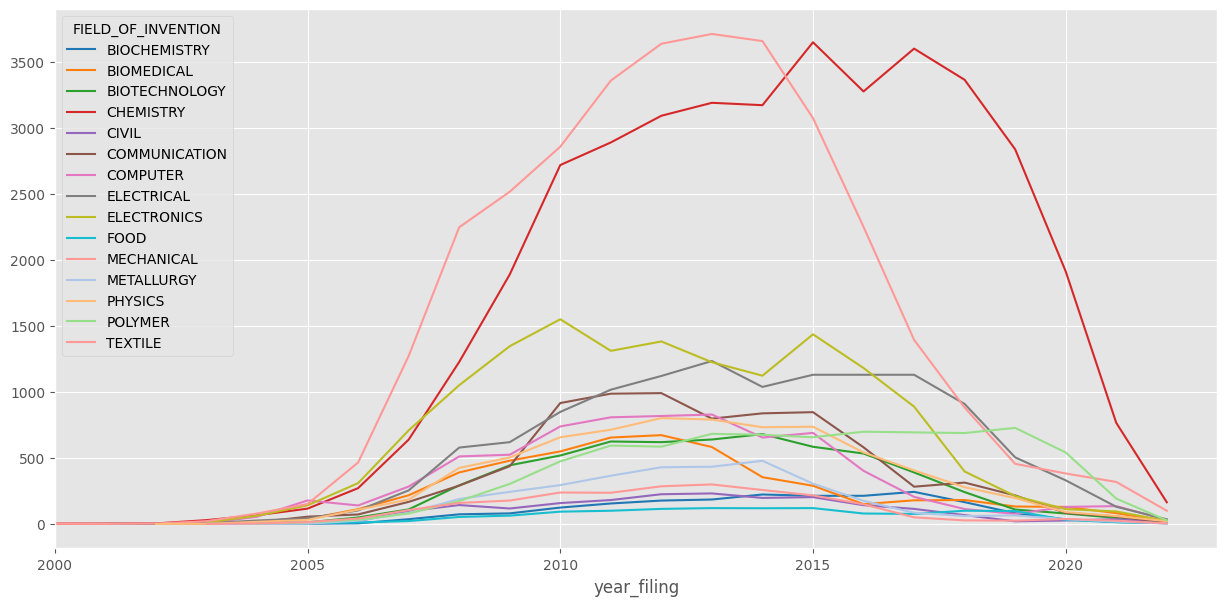

In [19]:
col=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#ff9896','#aec7e8',
'#ffbb78','#98df8a','#ff9896']
pat.pivot_table(index='year_filing',columns='FIELD_OF_INVENTION',values='diff',aggfunc='count').plot(figsize=(15,7),
                xlim=(2000,2023),color=col)

<Axes: xlabel='count', ylabel='APPLICATION_TYPE_DESC'>

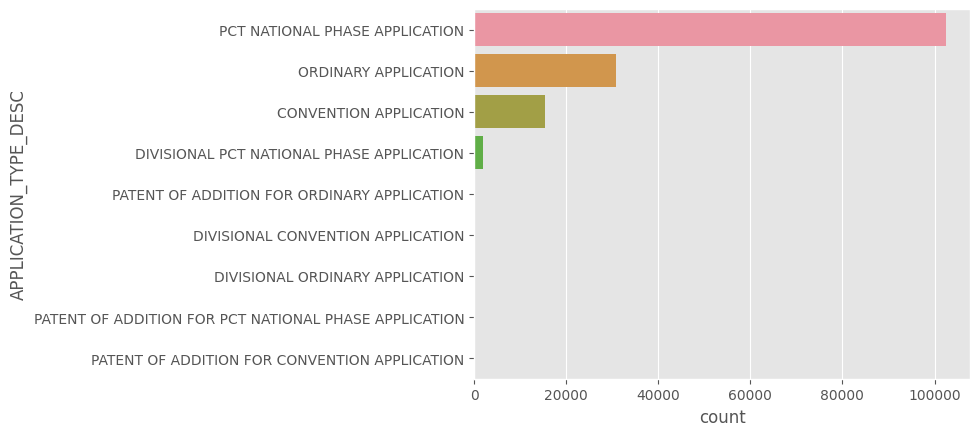

In [20]:
df=pat.APPLICATION_TYPE_DESC.value_counts().reset_index()
sns.barplot(data=df,x='count',y='APPLICATION_TYPE_DESC')

### The top 10 inventions with more number of claims

In [21]:
pd.set_option('display.max_colwidth', None)

In [22]:
top_10=pat.sort_values('NO_OF_CLAIMS',ascending=False).head(10)[['TITLE_OF_INVENTION','FIELD_OF_INVENTION']].reset_index(drop=True)
top_10

,TITLE_OF_INVENTION,FIELD_OF_INVENTION
0,MICRO ASSEMBLED LED DISPLAYS,ELECTRICAL
1,COMPOSITIONS AND METHODS FOR MODULATING HBV AND TTR EXPRESSION,BIOCHEMISTRY
2,"SIGNALING MECHANISMS AND SYSTEMS FOR ENABLING,TRANSMITTING AND MAINTAINING INTERACTIVITY FEATURES ON MOBILE DEVICES IN A MOBILE BROADCAST COMMUNICATION SYSTEM",ELECTRONICS
3,“ AN OPTICAL SENSOR DEVICE FOR OBTAINING BIOPHYSICAL INFORMATION ”,ELECTRONICS
4,PROCESSES FOR TREATING RED MUD,METALLURGY
5,MULTI BAND COLOR VISION FILTERS AND METHOD BY LP OPTIMIZATION,PHYSICS
6,ANTI CD38 ANTIBODIES AND FUSIONS TO ATTENUATED INTERFERON ALPHA 2B,BIOTECHNOLOGY
7,METHODS AND SYSTEMS FOR PROVIDING ACCESS TO A COMPUTING ENVIRONMENT,COMPUTER
8,SURFING DEVICE AND METHOD,MECHANICAL
9,METHODS FOR TREATING LIGNOCELLULOSIC MATERIALS,CHEMISTRY


### Avg years taken for each field of invention

In [23]:
temp_df=(pat.groupby('FIELD_OF_INVENTION')['diff'].mean()/365).round(1).reset_index()
temp_df.rename({'diff':'years'},inplace=True)
temp_df.style.bar(color='lightgreen')

,FIELD_OF_INVENTION,diff
0,BIOCHEMISTRY,6.200000
1,BIOMEDICAL,8.100000
2,BIOTECHNOLOGY,6.900000
3,CHEMISTRY,5.300000
4,CIVIL,7.400000
5,COMMUNICATION,7.700000
6,COMPUTER,8.300000
7,ELECTRICAL,6.600000
8,ELECTRONICS,7.600000
9,FOOD,6.500000


### Patents on time scale of year,month,day

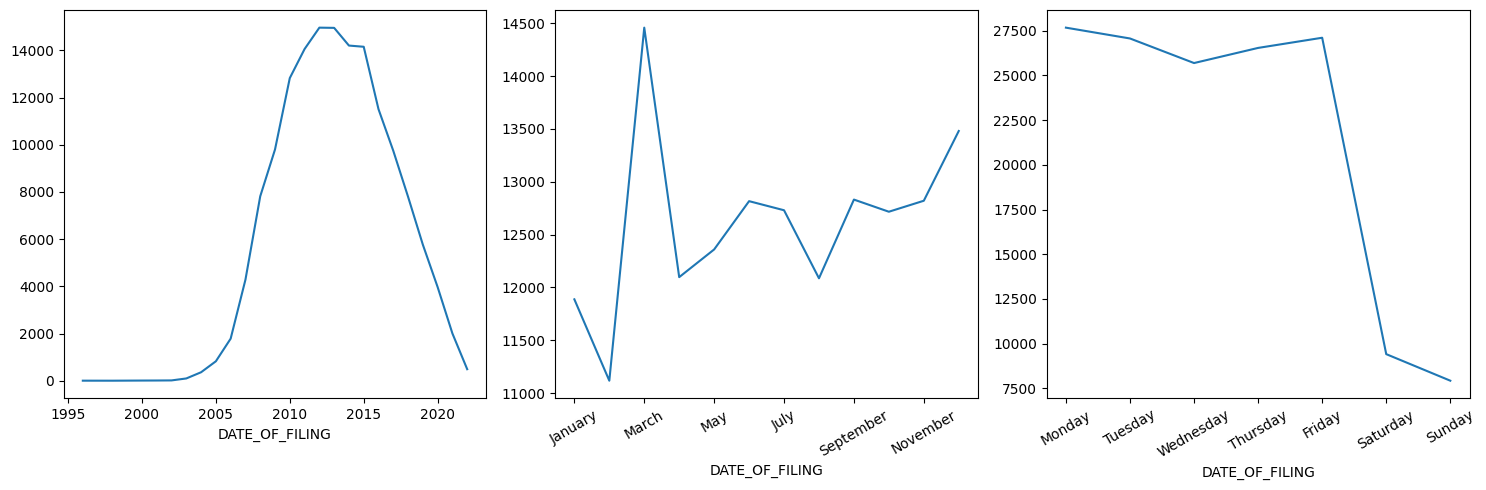

In [24]:
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
yy=pat['DATE_OF_FILING'].dt.year.value_counts().reset_index()
yy.sort_values('DATE_OF_FILING').plot(x='DATE_OF_FILING',y='count',legend=False,ax=ax1)
mm=pat['DATE_OF_FILING'].dt.month_name().value_counts().reset_index().iloc[[10,11,0,8,7,4,5,9,2,6,3,1]]
mm.plot(x='DATE_OF_FILING',y='count',legend=False,ax=ax2)
ax2.tick_params(axis='x', rotation=30)
dd=pat['DATE_OF_FILING'].dt.day_name().value_counts().reset_index().iloc[[0,2,4,3,1,5,6]]
dd.plot(x='DATE_OF_FILING',y='count',legend=False,ax=ax3)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Share of Fields with respect to the length of pages submitted

In [25]:
pat.head(1)

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,year_filing,diff
0,01/2016,2016-01-01,Delhi,CONVENTION APPLICATION,2010-04-01,"""PRODUCTION OF A PHARMACEUTICAL CONTAINER FROM THE MELT""",CHEMISTRY,25.0,24.0,2010,2101


<Axes: ylabel='NO_OF_PAGES'>

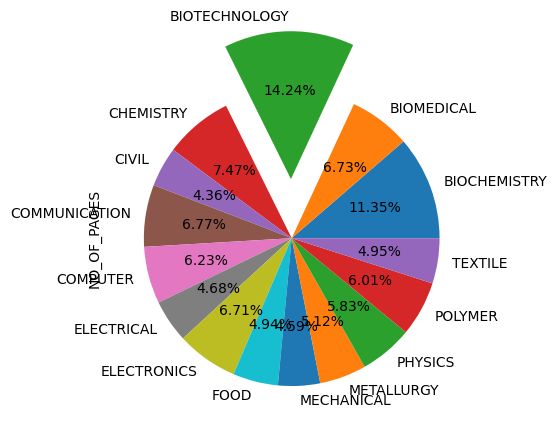

In [26]:
ex=[0,0,0.4,0,0,0,0,0,0,0,0,0,0,0,0]
pat.groupby('FIELD_OF_INVENTION')['NO_OF_PAGES'].mean().plot(kind='pie',autopct='%.2f%%',explode=ex)

### Patents which have maximum number of pages

In [27]:
pat.sort_values('NO_OF_PAGES',ascending=False).head(5)[['TITLE_OF_INVENTION']].reset_index(drop=True).style.set_properties(
                **{'background-color': 'brown','text-align':'left','font-weight':'bold','font-style': 'italic',
                  'color':'white'})

,TITLE_OF_INVENTION
0,OPTIMAL MAIZE LOCI
1,METHODS AND COMPOSITIONS FOR RNA DIRECTED TARGET DNA MODIFICATION AND FOR RNA DIRECTED MODULATION OF TRANSCRIPTION
2,An Interactive Graphics Decoder
3,"ISOLATED POLYPEPTIDES AND POLYNUCLEOTIDES USEFUL FOR INCREASING NITROGEN USE EFFICIENCY, ABIOTIC STRESS TOLERANCE, YIELD AND BIOMASS IN PLANTS"
4,"A METHOD FOR INCREASING NITROGEN USE EFFICIENCY, ABIOTIC STRESS TOLERANCE AND BIOMASS IN PLANT CELL"


### Top 10 Patents which took more time for publication

In [28]:
pat.sort_values('diff',ascending=False).head(10)[['TITLE_OF_INVENTION','FIELD_OF_INVENTION','diff']].reset_index(drop=True)

,TITLE_OF_INVENTION,FIELD_OF_INVENTION,diff
0,"""A HERBAL OPHTHALMIC FORMULATION FOR DELAYING THE ONSET AND PROGRESSION OF CATARACT.""",CHEMISTRY,7683
1,"""PRINTABLE SWELLING PASTE""",CHEMISTRY,7448
2,"""A SUSTAINED RELEASE AND LONG RESIDING OPTHALIMIC FORMULATION.""",CHEMISTRY,7388
3,"""METHOD AND APPARATUS FOR REPORTING STATUS INFORMATIN IN A FIXED WIRELESS TERMINAL""",ELECTRONICS,7249
4,"""APPARATUS AND METHOD FOR STIMULATING HAIR GROWTH""",BIOMEDICAL,7045
5,"""A DEVICE FOR GENERATING DIRECT ELECTRIC CURRENT FROM ELECTROMAGNETIC RADIO-WAVES""",ELECTRICAL,6969
6,"""MICRO-MONITOR TO MONITOR DATABASE ENVIRONMENTS""",COMPUTER,6935
7,"""FROST CONTROL IN DIRECT COOL REFRIGERATORS""",MECHANICAL,6862
8,METHOD AND SYSTEM FOR SHOWING UNANNOTATED TEXT NODES IN A DATA FORMATTED DOCUMENT,COMPUTER,6806
9,MOLD AND MOLDING MACHINE FOR MAKING OPHTHALMIC DEVICES,MECHANICAL,6665


In [27]:
words=pat['TITLE_OF_INVENTION'].str.strip('“').str.strip('”').str.strip('"').str.lower().str.cat(sep=' ').split()

In [33]:
from nltk.corpus import stopwords
w=[]
for i in words:
    if i not in stopwords.words('english'):
        w.append(i)

In [47]:
from collections import Counter
c=Counter(w)
c.most_common(10)

[('method', 42056),
 ('system', 19918),
 ('device', 18027),
 ('process', 12505),
 ('apparatus', 11132),
 ('thereof', 7511),
 ('composition', 6624),
 ('methods', 6212),
 ('control', 5505),
 ('producing', 5273)]

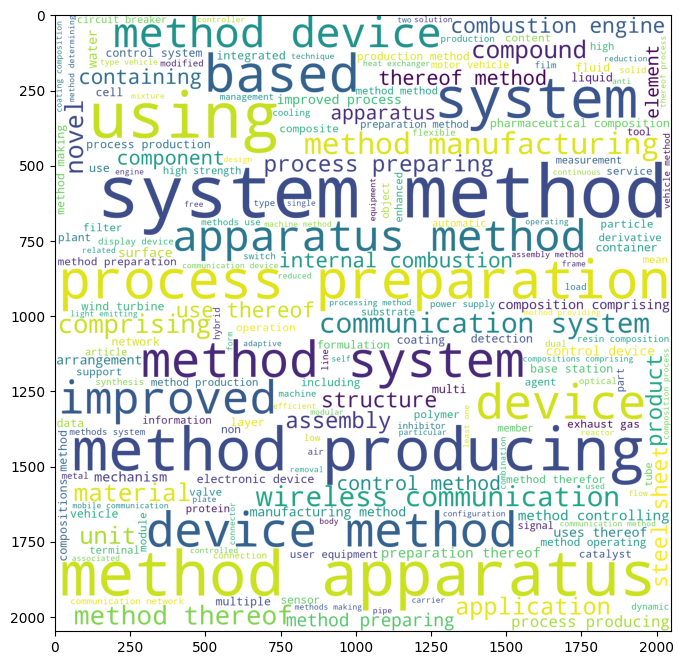

In [45]:
from wordcloud import WordCloud
wc=WordCloud(background_color='white',width=2048,height=2048,min_font_size=10)
cloud=wc.generate(' '.join(w))
plt.figure(figsize=(15,8))
plt.imshow(cloud)